#### Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
import seaborn as sns; sns.set() 

In [3]:
# Seaborn Styles?

#### Import Data

In [4]:
# read usa data --- Filepath will be harder than usual!
usa = pd.read_csv('../../DS201-1 W1D2/data/census_2015/acs2015_county_data.csv')
usa.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [32]:
# Pick a state to filter your dataframe by, save it to a new state_df. 
ca = usa[usa['State'] == 'Florida']

ca.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
320,12001,Florida,Alachua,254218,122968,131250,8.9,62.7,19.6,0.3,...,3.3,4.8,4.1,20.6,116659,69.1,26.6,4.3,0.1,7.9
321,12003,Florida,Baker,27135,14277,12858,2.4,82.0,14.5,0.1,...,0.7,0.6,3.0,29.6,10174,73.2,22.3,4.4,0.1,8.9
322,12005,Florida,Bay,175353,86800,88553,5.5,77.9,10.5,0.5,...,1.7,2.0,2.8,22.1,77894,76.4,17.0,6.4,0.3,8.6
323,12007,Florida,Bradford,27223,15150,12073,3.8,74.4,19.9,0.1,...,2.4,0.4,1.7,31.4,9225,73.6,22.3,4.1,0.0,12.4
324,12009,Florida,Brevard,553591,270544,283047,9.1,76.1,9.9,0.3,...,1.1,2.7,5.0,24.2,229693,80.5,13.9,5.4,0.2,10.9


##### Run a .info() to look at the columns that you can compare

<br>

### Scatter Plots

In [33]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 320 to 386
Data columns (total 37 columns):
CensusId           67 non-null int64
State              67 non-null object
County             67 non-null object
TotalPop           67 non-null int64
Men                67 non-null int64
Women              67 non-null int64
Hispanic           67 non-null float64
White              67 non-null float64
Black              67 non-null float64
Native             67 non-null float64
Asian              67 non-null float64
Pacific            67 non-null float64
Citizen            67 non-null int64
Income             67 non-null float64
IncomeErr          67 non-null float64
IncomePerCap       67 non-null int64
IncomePerCapErr    67 non-null int64
Poverty            67 non-null float64
ChildPoverty       67 non-null float64
Professional       67 non-null float64
Service            67 non-null float64
Office             67 non-null float64
Construction       67 non-null float64
Production   

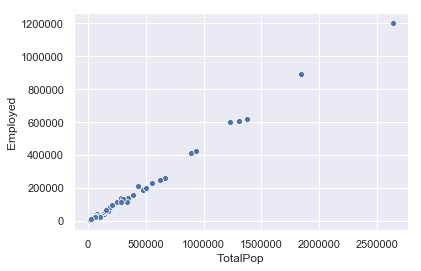

In [34]:
# Pick two columns out of this new state_df 
# and examine potential correlations!
plt.figure()
x = "TotalPop"
y = "Employed"

sns.scatterplot(x, y, data = ca) 
ax = plt.gca()
ax.set_xlabel(x)
ax.set_ylabel(y)
plt.show()

<br>

### Covariance

In [9]:
# use np.cov() to create a covariance matrix, 
# are you sure you know what this is saying?

np.cov(ca[x], ca[y])

array([[  5.88693285, -14.18241984],
       [-14.18241984,  56.29490926]])

<br>

### Pearson Correlation Coefficient

In [10]:
def pearson_coeff(x,y):
    covariance = np.cov(x,y)[0,1]
    std_x = np.std(x)
    std_y = np.std(y)
    
    return covariance / (std_x * std_y)

In [11]:
# Use the pearson_coeff function to determine 
# how the two features correlate

# Do you remember how the Pearson Correlation Coefficient works?
# How does it relate to the covariance...look at the function def!
pearson_coeff(ca[x], ca[y])

-0.7927283188089049

<br>

### Repeat the previous to find a total of 3 examples for the 3 differtent types of correlations that the Pearson Correlation Coefficient describes!

#### The different types are listed below... Go ahead and count your first set of numerical columns to whichever category of the 3 it ends up falling under.

#### 1. Negative Correlation

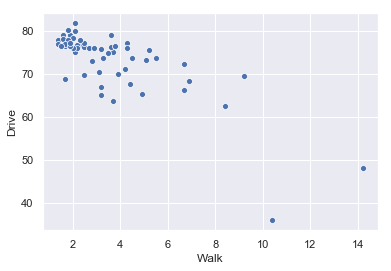

-0.7927283188089049

In [13]:
plt.figure()
a = "Walk"
b = "Drive"

sns.scatterplot(a, b, data = ca) 
ax = plt.gca()
ax.set_xlabel(a)
ax.set_ylabel(b)
plt.show()

pearson_coeff(ca[a],ca[b])

#### 2. No Correlation

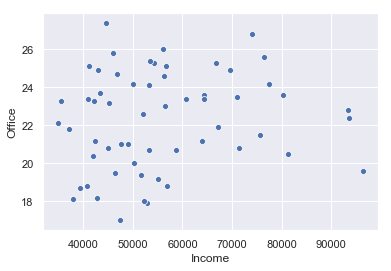

0.1448555645488304

In [23]:
plt.figure()
a = "Income"
b = "Office"

sns.scatterplot(a, b, data = ca) 
ax = plt.gca()
ax.set_xlabel(a)
ax.set_ylabel(b)
plt.show()

pearson_coeff(ca[a],ca[b])

#### 3. Positive Correlation

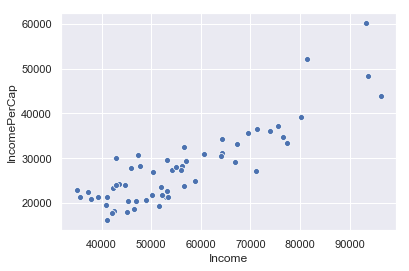

0.8830411224218325

In [30]:
plt.figure()
a = "Income"
b = "IncomePerCap"

sns.scatterplot(a, b, data = ca) 
ax = plt.gca()
ax.set_xlabel(a)
ax.set_ylabel(b)
plt.show()

pearson_coeff(ca[a],ca[b])